In [1]:
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import networkx as nx
import time
import datetime

#%matplotlib notebook

In [2]:
inside_class_interactions = {} #key is timestamp, value is occurances when students are in the same class
outside_class_interactions = {} #key is timestamp, value is occurances when students are in different class
total_class_interactions = {} #key is timestamp, value is occurances
with open("data/original/High-School_data_2013.csv", 'r') as infile:
    reader = csv.reader(infile, delimiter=" ")
    for t, id1, id2, cls1, cls2 in reader:
        ts = datetime.datetime.fromtimestamp(time.mktime(time.gmtime(int(t) + 3600))) #.strftime("%A, %B %d, %Y %H:%M:%S") #time.strftime("%a %H:%M:%S", time.gmtime(int(t) + 3600))
        #datetime datetime objects
        
        #total interactions
        if ts in total_class_interactions:
            total_class_interactions[ts] += 1
        else:
            total_class_interactions[ts] = 1
            
        #outside class interractions
        if cls1 != cls2:
            if ts in outside_class_interactions:
                outside_class_interactions[ts] += 1
            else:
                outside_class_interactions[ts] = 1
                
        #inside class interractions
        if cls1 == cls2:
            if ts in inside_class_interactions:
                inside_class_interactions[ts] += 1
            else:
                inside_class_interactions[ts] = 1

#adding zeroes for the timestamps that aren't there
for timestamp in total_class_interactions.keys():
    if not (timestamp in inside_class_interactions):
        inside_class_interactions[timestamp] = 0
    if not (timestamp in outside_class_interactions):
        outside_class_interactions[timestamp] = 0
                
#dictionaries are sorted by keys

In [3]:
inside_percentages = {} #inside interactions / total interactions for that timestamp
outside_percentages = {} #outside interactions / total interactions for that timestamp

for timestamp in inside_class_interactions.keys():
    inside_percentages[timestamp] = inside_class_interactions[timestamp] / total_class_interactions[timestamp]
    
for timestamp in outside_class_interactions.keys():
    outside_percentages[timestamp] = outside_class_interactions[timestamp] / total_class_interactions[timestamp]


<BarContainer object of 7375 artists>

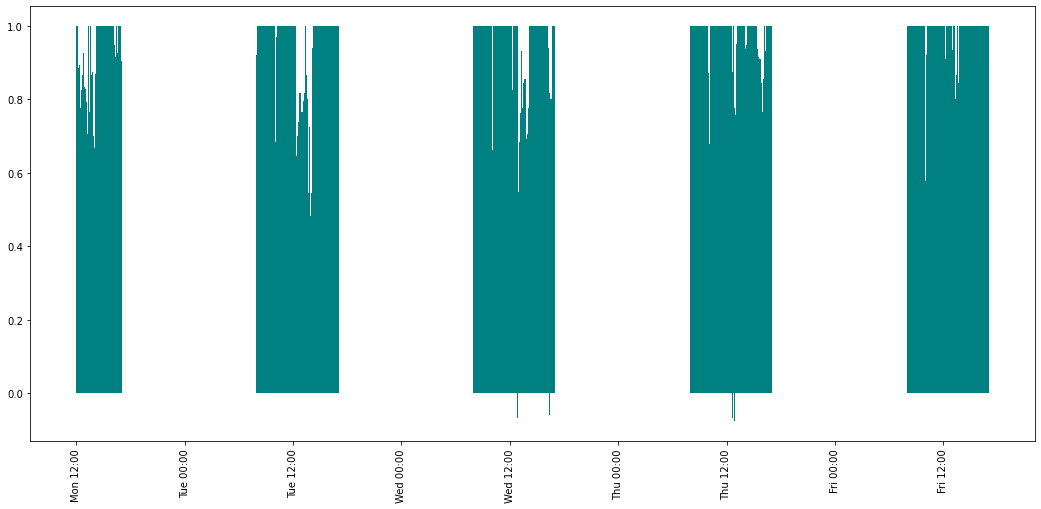

In [4]:
difference = {} #key is timestamp, value is inside % - outside %

for timestamp in total_class_interactions.keys():
    difference[timestamp] = inside_percentages[timestamp] - outside_percentages[timestamp]

figure, axes = plt.subplots(figsize=(18,8)) # set the size that you'd like (width, height)
axes.xaxis.set_major_formatter(mdates.DateFormatter('%a %H:%M'))
plt.xticks(rotation=90)
plt.bar(list(difference.keys()), list(difference.values()), width=0.005, color="teal")

<BarContainer object of 7375 artists>

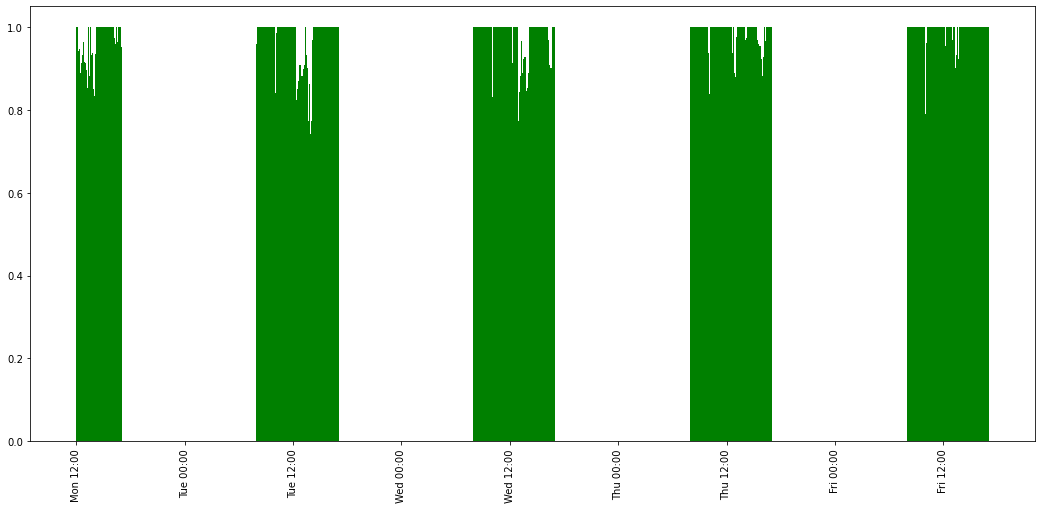

In [5]:
figure, axes = plt.subplots(figsize=(18,8)) # set the size that you'd like (width, height)
axes.xaxis.set_major_formatter(mdates.DateFormatter('%a %H:%M'))
plt.xticks(rotation=90)
plt.bar(list(inside_percentages.keys()), list(inside_percentages.values()), width=0.005, color="green")

If the value of the bar is equal to 100% can I get it to be a different color?

<BarContainer object of 7375 artists>

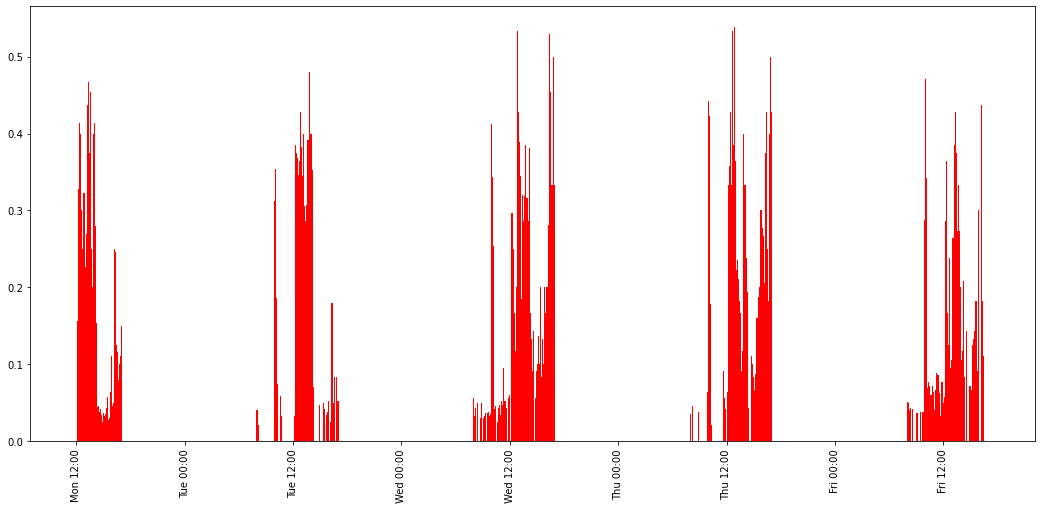

In [6]:
figure, axes = plt.subplots(figsize=(18,8)) # set the size that you'd like (width, height)
axes.xaxis.set_major_formatter(mdates.DateFormatter('%a %H:%M'))
plt.xticks(rotation=90)
plt.bar(list(outside_percentages.keys()), list(outside_percentages.values()), width=0.005, color="red")

<BarContainer object of 7375 artists>

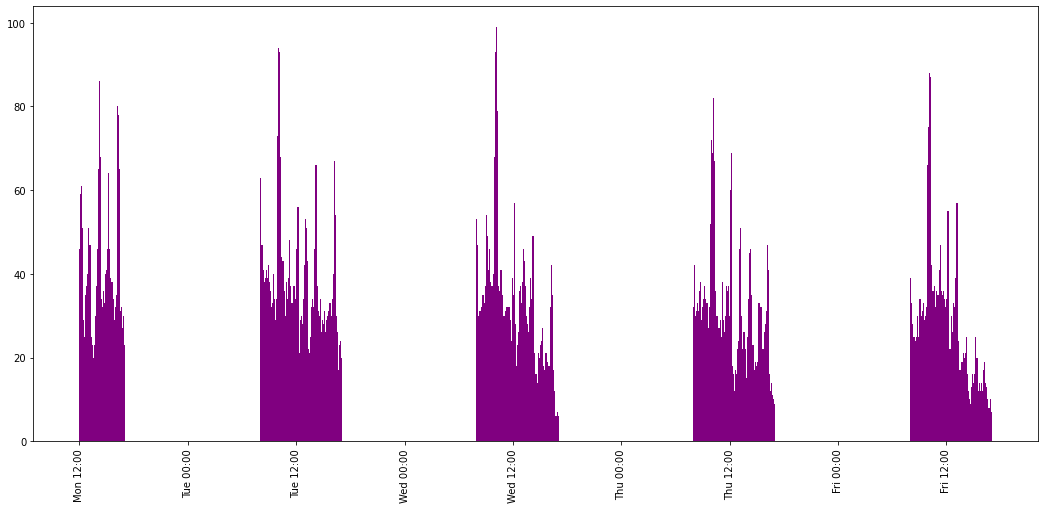

In [7]:
figure, axes = plt.subplots(figsize=(18,8)) # set the size that you'd like (width, height)
axes.xaxis.set_major_formatter(mdates.DateFormatter('%a %H:%M'))
plt.xticks(rotation=90)
plt.bar(list(total_class_interactions.keys()), list(total_class_interactions.values()), width=0.005, color="purple")